### Основные понятия

 Модель - условные образ объекта исследования, получаемый для отображения его характеристик.

### Алгоритм построения мат модели

1. постановка задачи
2. анализ характеристик объекта исследования
3. формализация и классификация переменных
4. составление гипотезы моделирования
5. выбор математического аппарата моделирования
6. разработка уравнений модели (структурная идентификация)
7. параметрическая идентификация модели
8. разработка или выбор алгоритма решения
9. программная реализация алгоритма
10. численное исследование и проверка адекватности модели
11. анализ и интерпретация результатов


**Основная задача системного анализа** - опрделить выходной сигнал системы по известному входному сигналу и характеристикам модели

**Задача идентефикации** - обратная задача сис анализа. По заданным входным и выходным определить уравнения, описывающие поведение системы.

Подход на основе идентефикации назыывают **эксперементальным**.
Подход основаный на законах физики, химии и т.п. - **аналитический**.

### Процедура идентефикации 

![alt text](image.png)

- 𝑥(𝑡) – входное воздействие
- 𝜂(𝑡) – неконтролируемое случайное воздействие
- 𝑦(𝑡) – выходной сигнал объекта 
- 𝑦𝑀(𝑡) – выходной сигнал модели
- 𝑒(𝑡) – невязка между выходными сигналами объекта и модели
- 𝑏, 𝜃 – соответственно векторы параметров объекта и модели


Связь между входом и выходом объекта описывается оператором $f_0$ $$y_{об}=f_0(x(t), \mu(t), b)$$

На основании входных и выходный данных объекта строится модель - оператор $f$, преобразующий входное воздействие $x(t)$ в реакцию $y_M(t)$ $$y_M (t) = f(x(t),0, \theta)$$

**Задача структурной идентефикации** - выбор оператора $f$ из некоторого класса, обеспечивающего наилучшую аппроксимацию.

**Задача параметрической идентефикации** - определение вектора параметров $\theta$, при котором входной сигнал модели ммксимально близок к выходному сигналу объекта.





## 1

In [1]:
from collections import Counter
import math
f = open("moscow_2021.txt", "r")
data = []
for num in f:
    num = num.strip()
    if num:
        data.append(int(num))
data.sort()
sorted_data = data
data_counter = Counter(data)
print(sorted(data_counter.items()))


[(14, 49), (15, 53), (16, 236), (17, 126), (18, 806), (19, 971), (20, 910), (21, 716), (22, 944), (23, 1071), (24, 810), (25, 1050), (26, 980), (27, 1263), (28, 1113), (29, 1340), (30, 734), (31, 1115), (32, 796), (33, 758), (34, 869), (35, 676), (36, 1198), (37, 522), (38, 1006), (39, 695), (40, 723), (41, 837), (42, 978), (43, 820), (44, 1032), (45, 690), (46, 677), (47, 831), (48, 1026), (49, 1060), (50, 150), (51, 188), (52, 193), (53, 47), (54, 26), (55, 62), (56, 76), (57, 136), (58, 262), (59, 74), (60, 266), (61, 226), (62, 139), (63, 183), (64, 189), (65, 79), (66, 188), (67, 128), (69, 202), (70, 26), (71, 85), (73, 17)]


In [2]:
import random

import numpy as np
ages = data_counter.keys()
values = data_counter.values()

data_arr = list(sorted(data_counter.items()))
x = []
for i in range(0,len(data_arr)):
    x.append(data_arr[i][0])
print(x)
y= []
for i in range(0,len(data_arr)):
    y.append(data_arr[i][1])
print(y)

# 14 49
x_1 = data_arr[0][0] 
y_1 = data_arr[0][1]

x_s = data_arr[len(data_arr)//2][0]

print(f'x_s ={x_s}')
    

x_min = 0
x_max=0
y_min = 0
y_max = 0

if x_s in x: 
    y_s =  y[x.index(x_s)]
else: 
    for i in range(len(x) - 1):
        if x[i] <= x_s <= x[i + 1]:
            print("varya")
            x_min = x[i]
            x_max=x[i+1]
            y_min = y[i]
            y_max = y[i+1]
            y_s = y_min + (y_max-y_min/x_max-x_min)*(x_s-x_min)

def calculate_experimental_y_s(x_s):
    # Найти интервал, в который попадает x_s
    for i in range(len(x) - 1):
        if x[i] <= x_s <= x[i + 1]:
            x_i, x_i1 = x[i], x[i + 1]
            y_i, y_i1 = y[i], y[i + 1]
            # Линейная интерполяция
            y_s = y_i + ((y_i1 - y_i) / (x_i1 - x_i)) * (x_s - x_i)
            print(x_i, x_s)
            return round(y_s, 1)
    return None

print(f'x_min = {x_min}')
print(f'x_max = {x_max}')
print(f'y_min = {y_min}')
print(f'y_max = {y_max}')

print()
x_n = data_arr[len(data_arr)-1][0]
y_n = data_arr[len(data_arr)-1][1]

print(f'x_1 = {x_1}')
print(f'y_1 = {y_1}')
print(f'x_s = {x_s}')
print(f'y_s = {y_s}')
print(f'x_n = {x_n}')
print(f'y_n = {y_n}')

delta_sum = len(data)

table_data = []

[14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 71, 73]
[49, 53, 236, 126, 806, 971, 910, 716, 944, 1071, 810, 1050, 980, 1263, 1113, 1340, 734, 1115, 796, 758, 869, 676, 1198, 522, 1006, 695, 723, 837, 978, 820, 1032, 690, 677, 831, 1026, 1060, 150, 188, 193, 47, 26, 62, 76, 136, 262, 74, 266, 226, 139, 183, 189, 79, 188, 128, 202, 26, 85, 17]
x_s =43
x_min = 0
x_max = 0
y_min = 0
y_max = 0

x_1 = 14
y_1 = 49
x_s = 43
y_s = 820
x_n = 73
y_n = 17


In [3]:
def result_delta(x,y,y_s, delta_sum):
    delta_s_1 = abs(y_s - y)
    print(delta_s_1)
    print(delta_sum)
    delta_s_1_perc = round(delta_s_1/delta_sum*100, 2)
    table_row = []
    
    table_row.extend((round(x,2),round(y,2),round(y_s,2),round(delta_s_1,2), delta_s_1_perc))
    #return f'x_mid = {x}  y_mid = {y} delta_s = {delta_s_1} delta_s % = {delta_s_1_perc}%'
    return table_row

table_data = []

In [4]:
#условие 1

x_mid_1 = (x_1 + x_n)/2
y_mid_1 = (y_1 + y_n)/2


y_s_1 = calculate_experimental_y_s(x_mid_1)

print(result_delta(x_mid_1,y_mid_1, y_s_1, delta_sum,))
row = result_delta(round(x_mid_1, 1),round(y_mid_1,1), round(y_s_1, 1), delta_sum)
table_data.append(row)
print(table_data)



43 43.5
893.0
32423
[43.5, 33.0, 926.0, 893.0, 2.75]
893.0
32423
[[43.5, 33.0, 926.0, 893.0, 2.75]]


In [5]:
#усдловие 2

from math import sqrt


x_mid_2 = sqrt(x_1 * x_n)
y_mid_2 = sqrt(y_1 * y_n)
y_s_2 = calculate_experimental_y_s(x_mid_2) - 10

print(result_delta(x_mid_2,y_mid_2, y_s_2, delta_sum))

row = result_delta(round(x_mid_2, 1),round(y_mid_2, 1), round(y_s_2, 1), delta_sum)
table_data.append(row)
print(table_data)


31 31.96873472629156
767.1382606206764
32423
[31.97, 28.86, 796.0, 767.14, 2.37]
767.1
32423
[[43.5, 33.0, 926.0, 893.0, 2.75], [32.0, 28.9, 796.0, 767.1, 2.37]]


In [6]:
# условие 3

x_mid_3 = (x_1 + x_n)/2
y_mid_3 = sqrt(y_1*y_n)
y_s_3 = calculate_experimental_y_s(x_mid_3)

print(result_delta(x_mid_3,y_mid_3, y_s_3, delta_sum))

row = result_delta(round(x_mid_3, 1),round(y_mid_3, 1), round(y_s_3, 1), delta_sum)
table_data.append(row)
print(table_data)



43 43.5
897.1382606206764
32423
[43.5, 28.86, 926.0, 897.14, 2.77]
897.1
32423
[[43.5, 33.0, 926.0, 893.0, 2.75], [32.0, 28.9, 796.0, 767.1, 2.37], [43.5, 28.9, 926.0, 897.1, 2.77]]


In [7]:
# условие 4

x_mid_4 = 2*x_1*x_n / (x_1+x_n)
y_mid_4 = (y_1+y_n) / 2
y_s_4 = calculate_experimental_y_s(x_mid_4)

print(result_delta(x_mid_4,y_mid_4, y_s_4, delta_sum))

row = result_delta(round(x_mid_4, 1),round(y_mid_4,1), round(y_s_4,1), delta_sum)
table_data.append(row)
print(table_data)


23 23.49425287356322
909.0
32423
[23.49, 33.0, 942.0, 909.0, 2.8]
909.0
32423
[[43.5, 33.0, 926.0, 893.0, 2.75], [32.0, 28.9, 796.0, 767.1, 2.37], [43.5, 28.9, 926.0, 897.1, 2.77], [23.5, 33.0, 942.0, 909.0, 2.8]]


In [8]:
# условие 5

x_mid_5 =  (x_1+x_n) / 2
y_mid_5 = 2*y_1*y_n / (y_1+y_n)
y_s_5 = calculate_experimental_y_s(x_mid_5)

print(result_delta(x_mid_5,y_mid_5, y_s_5, delta_sum))

row = result_delta(round(x_mid_5, 1),round(y_mid_5, 1), round(y_s_5, 1), delta_sum)
table_data.append(row)
print(table_data)


43 43.5
900.7575757575758
32423
[43.5, 25.24, 926.0, 900.76, 2.78]
900.8
32423
[[43.5, 33.0, 926.0, 893.0, 2.75], [32.0, 28.9, 796.0, 767.1, 2.37], [43.5, 28.9, 926.0, 897.1, 2.77], [23.5, 33.0, 942.0, 909.0, 2.8], [43.5, 25.2, 926.0, 900.8, 2.78]]


In [9]:
# условие 6

x_mid_6 = 2*x_1*x_n / (x_1+x_n)
y_mid_6 = 2*y_1*y_n / (y_1+y_n)
y_s_6 = calculate_experimental_y_s(x_mid_6)

print(result_delta(x_mid_6,y_mid_6, y_s_6, delta_sum))

row = result_delta(round(x_mid_6,1),round(y_mid_6, 1), round(y_s_6, 1), delta_sum)
table_data.append(row)
print(table_data)



23 23.49425287356322
916.7575757575758
32423
[23.49, 25.24, 942.0, 916.76, 2.83]
916.8
32423
[[43.5, 33.0, 926.0, 893.0, 2.75], [32.0, 28.9, 796.0, 767.1, 2.37], [43.5, 28.9, 926.0, 897.1, 2.77], [23.5, 33.0, 942.0, 909.0, 2.8], [43.5, 25.2, 926.0, 900.8, 2.78], [23.5, 25.2, 942.0, 916.8, 2.83]]


In [10]:
# условие 7

x_mid_7 = sqrt(x_1 * x_n)
y_mid_7 = (y_1+y_n) / 2
y_s_7 = calculate_experimental_y_s(x_mid_7) - 10

print(result_delta(x_mid_7,y_mid_7, y_s_7, delta_sum))

row = result_delta(round(x_mid_7, 1),round(y_mid_7, 1), round(y_s_7, 1), delta_sum)
table_data.append(row)
print(table_data)



31 31.96873472629156
763.0
32423
[31.97, 33.0, 796.0, 763.0, 2.35]
763.0
32423
[[43.5, 33.0, 926.0, 893.0, 2.75], [32.0, 28.9, 796.0, 767.1, 2.37], [43.5, 28.9, 926.0, 897.1, 2.77], [23.5, 33.0, 942.0, 909.0, 2.8], [43.5, 25.2, 926.0, 900.8, 2.78], [23.5, 25.2, 942.0, 916.8, 2.83], [32.0, 33.0, 796.0, 763.0, 2.35]]


[[43.5, 33.0, 926.0, 893.0, 2.75], [32.0, 28.9, 796.0, 767.1, 2.37], [43.5, 28.9, 926.0, 897.1, 2.77], [23.5, 33.0, 942.0, 909.0, 2.8], [43.5, 25.2, 926.0, 900.8, 2.78], [23.5, 25.2, 942.0, 916.8, 2.83], [32.0, 33.0, 796.0, 763.0, 2.35]]
Минимальное значение разностей: 763.0
   x_mid  y_mid    y_s  delta  delta_perc
0   43.5   33.0  926.0  893.0        2.75
1   32.0   28.9  796.0  767.1        2.37
2   43.5   28.9  926.0  897.1        2.77
3   23.5   33.0  942.0  909.0        2.80
4   43.5   25.2  926.0  900.8        2.78
5   23.5   25.2  942.0  916.8        2.83
6   32.0   33.0  796.0  763.0        2.35


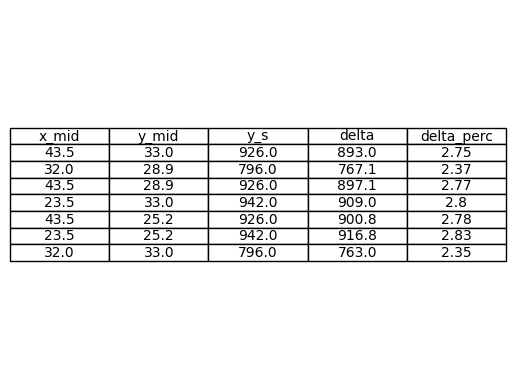

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

print(table_data)

df = pd.DataFrame(table_data, columns=['x_mid', 'y_mid', 'y_s', 'delta', 'delta_perc'])

min_delta_s = df['delta'].min()
print(f"Минимальное значение разностей: {min_delta_s}")

print(df)

fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

plt.show()


# Виды зависимостей 

1. $y=ax+b$
2. $y=ax^b$
3. $y=ab^x$
4. $y=a+\frac{b}{x}$
5. $y=\frac{1}{ax+b}$
6. $y=\frac{x}{ax+b}$
7. $y=a \ln(x)+b$

## 2 Задание

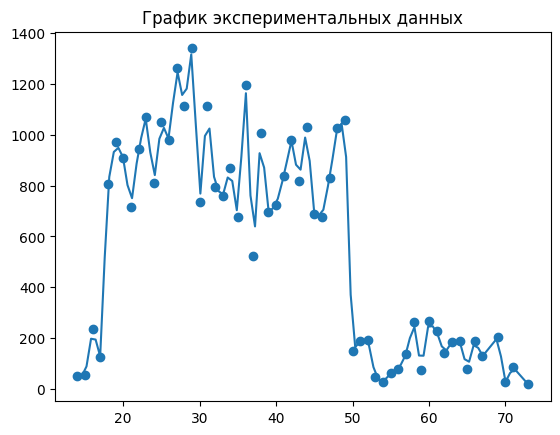

In [12]:
import matplotlib.pyplot as plt

data_counter

plt.scatter(data_counter.keys(), data_counter.values())

# Получение координат точек
x = list(data_counter.keys())
y = list(data_counter.values())

x_new = np.linspace(min(x), max(x), 100)  
y_new = np.interp(x_new, x, y)  

plt.plot(x_new, y_new)
plt.title("График экспериментальных данных")
plt.show()


Минимальное значение х: 14
Максимальное значение х: 73
Массив х: [14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73]
Массив y: [49.0, 53.0, 236.0, 126.0, 806.0, 971.0, 910.0, 716.0, 944.0, 1071.0, 810.0, 1050.0, 980.0, 1263.0, 1113.0, 1340.0, 734.0, 1115.0, 796.0, 758.0, 869.0, 676.0, 1198.0, 522.0, 1006.0, 695.0, 723.0, 837.0, 978.0, 820.0, 1032.0, 690.0, 677.0, 831.0, 1026.0, 1060.0, 150.0, 188.0, 193.0, 47.0, 26.0, 62.0, 76.0, 136.0, 262.0, 74.0, 266.0, 226.0, 139.0, 183.0, 189.0, 79.0, 188.0, 128.0, 165.0, 202.0, 26.0, 85.0, 51.0, 17.0]
    x_new_int  y_new_int  diff_1  diff_2  diff_3  diff_4  diff_5  diff_6  \
0        14.0       49.0     4.0   179.0   106.0   391.0    51.0    35.0   
1        15.0       53.0   183.0    73.0   497.0   442.0    86.0    60.0   
2        16.0      236.0   110.0   5

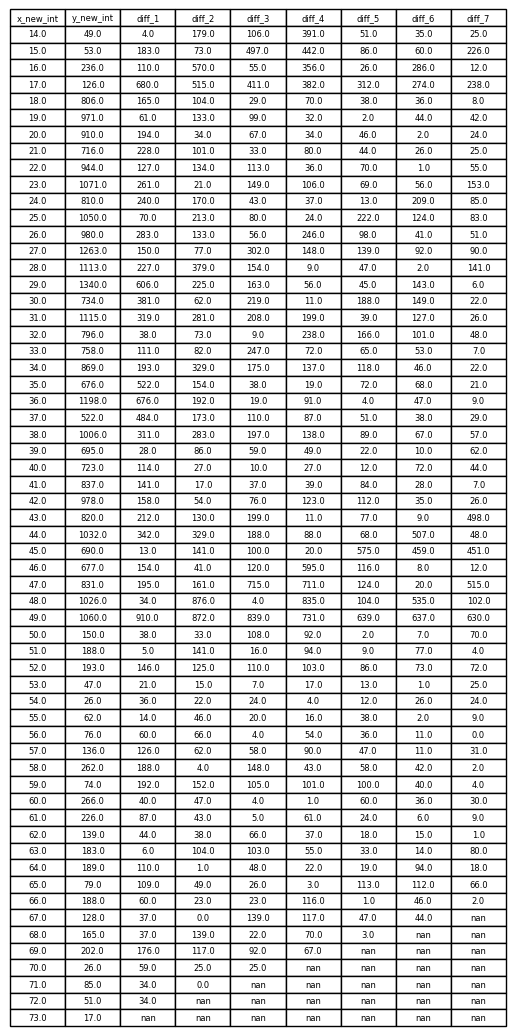

In [13]:
x_min = min(x)
x_max = max(x)
print(f"Минимальное значение х: {x_min}")
print(f"Максимальное значение х: {x_max}")

x_new_int = list(range(x_min, x_max+1))
print(f"Массив х: {x_new_int}")

y_new_int = []
for x_interpol in x_new_int:
    y_interpol = None
    for i in range(len(x) - 1):
        if x[i] <= x_interpol <= x[i + 1]:
            y_interpol = y[i] + (y[i + 1] - y[i]) * (x_interpol - x[i]) / (x[i + 1] - x[i])
            y_new_int.append(y_interpol)
            break
    if y_interpol is None:
        y_new_int.append(None)
print(f"Массив y: {y_new_int}")


def difference_arr(y_new_int):
    diff = []
    for i in range(1, len(y_new_int)):
        if y_new_int[i] is not None and y_new_int[i-1] is not None:
            diff.append(abs(abs(y_new_int[i])-abs(y_new_int[i-1])))
        else:
            diff.append(None)
    return diff

diff_1 = difference_arr(y_new_int)

diff = [diff_1]
for i in range(0,6):
    diff_i = difference_arr(diff[i])
    diff.append(diff_i)

data_diff = {
    'x_new_int': x_new_int,
    'y_new_int': y_new_int
}
for i, d in enumerate(diff):
    data_diff[f'diff_{i+1}'] = d


df = pd.DataFrame.from_dict(data_diff, orient='index').T

print(df)

fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

plt.show()

In [14]:
# max_diff_1 = max(abs(diff_1))
# max_diff_2 = max(abs(diff_2))
# max_diff_3 = max(abs(diff_3))
# max_diff_4 = max(abs(diff_4))
#print(f"Максимальное значение разностей: {max_delta_s}")
# print(f"Максимальное значение разностей diff_1: {max_diff_1}")
# print(f"Максимальное значение разностей diff_2: {max_diff_2}")
# print(f"Максимальное значение разностей diff_3: {max_diff_3}")
# print(f"Максимальное значение разностей diff_4: {max_diff_4}")
# print(diff)
diff_max=[]
for n in diff:
    diff_max.append(max(n))

print(diff_max)


sum_new_y = sum(y)
print(f"Сумма частот: {sum_new_y}")
two_perc_sum_y = sum_new_y*0.02
i = 0
while diff_max[i] > two_perc_sum_y:
    i+=1
    continue
    
print(f'подходящая степень апроксимирующего многочлена : {i+1}')



# print(f"2% от суммы частот: {two_perc_sum_y}")
sum_y=sum(y)
two_perc_sum_y_1 = sum_y*0.02
print(f"2% от суммы частот: {two_perc_sum_y_1}")





[910.0, 876.0, 839.0, 835.0, 639.0, 637.0, 630.0]
Сумма частот: 32423
подходящая степень апроксимирующего многочлена : 5
2% от суммы частот: 648.46


# Параметрическая идентификация

### Метод наименьших квадратов

Выходная переменная: y

Входные воздействия: $x: x_1, x_2, x_3, x_4, x_5, x_6 $

Задача: **аппроксимация кривой, построенной по точкам $(x_i,y_i)(i = 1,2,3,4,5,6)$, известной функции $f(x, \theta)$**

$$y(x_i) = \theta_0 + \theta_1x_i+\xi_i, i=\overline{1,n}$$

Полином 5й степени: $$y = a_0 + a_1x +  a_2x^2 + a_3x^3 + a_4x^4 + a_5x^5$$


Процедура линеаризации: 

Пусть $$u = x^i, v = y$$
$$v = a_0 + \sum_{i=1}^{m}a_i *u_i$$

Тогда 
$$y = a_0 + a_1u_1 +  a_2u_2 + a_3u_3 + a_4u_4 + a_5u_5$$



In [15]:
ages = data_counter.keys()
values = data_counter.values()

print(ages, values)
print(values)

dict_keys([14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 71, 73]) dict_values([49, 53, 236, 126, 806, 971, 910, 716, 944, 1071, 810, 1050, 980, 1263, 1113, 1340, 734, 1115, 796, 758, 869, 676, 1198, 522, 1006, 695, 723, 837, 978, 820, 1032, 690, 677, 831, 1026, 1060, 150, 188, 193, 47, 26, 62, 76, 136, 262, 74, 266, 226, 139, 183, 189, 79, 188, 128, 202, 26, 85, 17])
dict_values([49, 53, 236, 126, 806, 971, 910, 716, 944, 1071, 810, 1050, 980, 1263, 1113, 1340, 734, 1115, 796, 758, 869, 676, 1198, 522, 1006, 695, 723, 837, 978, 820, 1032, 690, 677, 831, 1026, 1060, 150, 188, 193, 47, 26, 62, 76, 136, 262, 74, 266, 226, 139, 183, 189, 79, 188, 128, 202, 26, 85, 17])


In [27]:
import numpy as np

##построим матрицу C,y,\theta


# Create the matrix with the first column as all 1s and the rest as the values from x1 to x6

ages = list(ages)

u_1 = ages
u_2 = np.array(ages)**2
u_3 = np.array(ages)**3
u_4 = np.array(ages)**4
u_5 = np.array(ages)**5

y = np.array(list(values))
C = np.column_stack((np.ones(len(ages)), u_1, u_2, u_3, u_4, u_5))
print(C)
print(y)

C_transpose = C.T
print(C_transpose)

CtC = np.dot(C_transpose, C)
CtC_inv = np.linalg.inv(CtC)
Cty = np.dot(C_transpose, y)
theta = np.dot(CtC_inv, Cty)

print("theta :", theta)

[[1.00000000e+00 1.40000000e+01 1.96000000e+02 2.74400000e+03
  3.84160000e+04 5.37824000e+05]
 [1.00000000e+00 1.50000000e+01 2.25000000e+02 3.37500000e+03
  5.06250000e+04 7.59375000e+05]
 [1.00000000e+00 1.60000000e+01 2.56000000e+02 4.09600000e+03
  6.55360000e+04 1.04857600e+06]
 [1.00000000e+00 1.70000000e+01 2.89000000e+02 4.91300000e+03
  8.35210000e+04 1.41985700e+06]
 [1.00000000e+00 1.80000000e+01 3.24000000e+02 5.83200000e+03
  1.04976000e+05 1.88956800e+06]
 [1.00000000e+00 1.90000000e+01 3.61000000e+02 6.85900000e+03
  1.30321000e+05 2.47609900e+06]
 [1.00000000e+00 2.00000000e+01 4.00000000e+02 8.00000000e+03
  1.60000000e+05 3.20000000e+06]
 [1.00000000e+00 2.10000000e+01 4.41000000e+02 9.26100000e+03
  1.94481000e+05 4.08410100e+06]
 [1.00000000e+00 2.20000000e+01 4.84000000e+02 1.06480000e+04
  2.34256000e+05 5.15363200e+06]
 [1.00000000e+00 2.30000000e+01 5.29000000e+02 1.21670000e+04
  2.79841000e+05 6.43634300e+06]
 [1.00000000e+00 2.40000000e+01 5.76000000e+02 1.3

In [30]:
# построим график по полученной формуле
import matplotlib.pyplot as plt

x = np.array([u_1, u_2, u_3, u_4, u_5])
y_pred = theta[0] + theta[1] * x[0] + theta[2] * np.mean(x[1]) + theta[3] * np.mean(x[2]) + theta[4] * np.mean(x[3]) + theta[5] * np.mean(x[4])
print("y_pred", y_pred)

y_pred [-19340.01016767 -18643.90426314 -17947.7983586  -17251.69245406
 -16555.58654952 -15859.48064498 -15163.37474044 -14467.26883591
 -13771.16293137 -13075.05702683 -12378.95112229 -11682.84521775
 -10986.73931322 -10290.63340868  -9594.52750414  -8898.4215996
  -8202.31569506  -7506.20979052  -6810.10388599  -6113.99798145
  -5417.89207691  -4721.78617237  -4025.68026783  -3329.5743633
  -2633.46845876  -1937.36255422  -1241.25664968   -545.15074514
    150.9551594     847.06106393   1543.16696847   2239.27287301
   2935.37877755   3631.48468209   4327.59058663   5023.69649116
   5719.8023957    6415.90830024   7112.01420478   7808.12010932
   8504.22601385   9200.33191839   9896.43782293  10592.54372747
  11288.64963201  11984.75553655  12680.86144108  13376.96734562
  14073.07325016  14769.1791547   15465.28505924  16161.39096377
  16857.49686831  17553.60277285  18945.81458193  19641.92048647
  20338.026391    21730.23820008]


In [37]:
print(f"Уравнение регрессии \n y = {theta[0]} + {theta[1]} * x + {theta[2]} * x^2 + {theta[3]} * x^3 + {theta[4]} * x^4 + {theta[5]} * x^5 ")


Уравнение регрессии 
 y = -5660.020731076598 + 696.1059045381844 * x + -27.068856867263094 * x^2 + 0.5042535383981885 * x^3 + -0.0047911681037930975 * x^4 + 1.887684539547685e-05 * x^5 


In [33]:


y_prognz = []
for i in range(len(u_1)):
    y_prognz.append(theta[0] + theta[1] * u_1[i] + theta[2] * u_2[i] + theta[3] * u_3[i] + theta[4] * u_4[i] + theta[5] * u_5[i])

print("Векторы прогноза = ", y_prognz)

remains = []
for i in range(len(y)):
    remains.append(y[i] - y_prognz[i])

print("Остатки = ", remains)

deviation = []
for i in range(len(y)):
    deviation.append(y[i]-np.mean(y))

print("Отклонения = ", deviation)

print("y среднее = ", np.mean(y))

Векторы прогноза =  [np.float64(-10.267397538292194), np.float64(164.71245317352282), np.float64(319.2686909812037), np.float64(454.9169154595852), np.float64(573.0939816921706), np.float64(675.1602654925784), np.float64(762.4019286259911), np.float64(836.0331840306011), np.float64(897.1985610390593), np.float64(946.975170599922), np.float64(986.3749704990987), np.float64(1016.3470305812992), np.float64(1037.7797979714815), np.float64(1051.5033622962983), np.float64(1058.2917209055465), np.float64(1058.8650440936117), np.float64(1053.8919403209188), np.float64(1043.9917214353761), np.float64(1029.736667893827), np.float64(1011.6542939834924), np.float64(990.2296130434232), np.float64(965.9074026859433), np.float64(939.094470018101), np.float64(910.1619168631134), np.float64(879.4474049818139), np.float64(847.2574212941045), np.float64(813.8695431003944), np.float64(779.5347033030584), np.float64(744.4794556278725), np.float64(708.908239845473), np.float64(673.005646992794), np.float64(

In [34]:
import numpy as np

remains = np.array(remains).flatten()
deviation = np.array(deviation).flatten()

remains_transpose = remains.T
rTr = np.dot(remains_transpose, remains)

deviation_transpose = deviation.T
dTd = np.dot(deviation_transpose, deviation)

R = 1 - (rTr/dTd)
print("R = ", R)

R =  0.747064607167281


In [41]:

def calculate_regression(*args, y):
    C = np.column_stack((np.ones(len(y)), *args))
    C_transpose = C.T

    CtC = np.dot(C_transpose, C)

    CtC_inv = np.linalg.inv(CtC)

    Cty = np.dot(C_transpose, y)

    theta = np.dot(CtC_inv, Cty)

    y_pred = theta[0] + sum(theta[i+1] * np.mean(arg) for i, arg in enumerate(args))

    y_prognz = [theta[0] + sum(theta[i+1] * arg[j] for i, arg in enumerate(args)) for j in range(len(y))]

    remains = [y[i] - y_prognz[i] for i in range(len(y))]

    deviation = [y[i] - np.mean(y) for i in range(len(y))]

    remains = np.array(remains)
    deviation = np.array(deviation)

    remains_transpose = remains.T
    rTr = np.dot(remains_transpose, remains)

    deviation_transpose = deviation.T
    dTd = np.dot(deviation_transpose, deviation)

    R = 1 - (rTr / dTd)
    equation = f"y = {theta[0]}"
    for i in range(1, len(theta)):
        equation += f" + {theta[i]} * x^{i}"
    print(f"Уравнение регрессии \n {equation}")
    return theta, y_pred, y_prognz, remains, deviation, R

theta, y_pred, y_prognz, remains, deviation, R = calculate_regression(u_1, u_2, u_3, y=y)
print("theta:", theta)
print("y_pred:", y_pred)
print("y_prognz:", y_prognz)
print("remains:", remains)
print("deviation:", deviation)
print("R:", R)


Уравнение регрессии 
 y = -2629.99945637607 + 283.64235526390985 * x^1 + -6.790090845884379 * x^2 + 0.04710547999689396 * x^3
theta: [-2.62999946e+03  2.83642355e+02 -6.79009085e+00  4.71054800e-02]
y_pred: 559.0172413794626
y_prognz: [np.float64(139.39314863680647), np.float64(255.84642724810965), np.float64(362.95901736736414), np.float64(461.0135518745519), np.float64(550.2926636496541), np.float64(631.0789855726521), np.float64(703.655150523527), np.float64(768.3037913822609), np.float64(825.3075410288343), np.float64(874.9490323432292), np.float64(917.5108982054262), np.float64(953.2757714954078), np.float64(982.526285093154), np.float64(1005.5450718786478), np.float64(1022.614764731869), np.float64(1034.0179965327998), np.float64(1040.0374001614214), np.float64(1040.9556084977157), np.float64(1037.0552544216625), np.float64(1028.6189708132451), np.float64(1015.9293905524432), np.float64(999.2691465192383), np.float64(978.9208715936143), np.float64(955.1671986555489), np.float64(9